In [1]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Flatten, Dense
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import backend as K
from keras import initializers
import keras

import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os import system
import os
import random

import imageio

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [62]:
averaging_kernel_weight = 1./81

image = imageio.imread("./images/briefs_gray.bmp")
patch_size = 56  # default value of PATCH_SIZE in https://github.com/opencv/opencv_contrib/blob/master/modules/xfeatures2d/src/brief.cpp
patch = image[96: 96 + patch_size, 68: 68 + patch_size]
patch_with_chnl_dim = np.expand_dims(patch, axis=-1)
print(patch_with_chnl_dim.shape)
patches = np.expand_dims(patch_with_chnl_dim, axis=0)
print(patches.shape)

(56, 56, 1)
(1, 56, 56, 1)


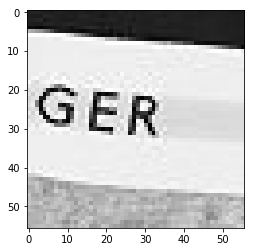

In [58]:
plt.imshow(patch, cmap='gray')

In [59]:
input_shape = (patch_size, patch_size, 1)
input_img = Input(shape=input_shape)



average_blurred = Conv2D(1, (9, 9), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight), bias_initializer=keras.initializers.Zeros(), trainable=False)(input_img)

blurrer = Model(input_img, average_blurred)

blurrer.compile(optimizer='adadelta', loss="binary_crossentropy")
blurrer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 1)         82        
Total params: 82
Trainable params: 0
Non-trainable params: 82
_________________________________________________________________


In [71]:
patch_blurred = blurrer.predict(patches)[0, :, :, 0]

In [72]:
patch_blurred.shape

(48, 48)

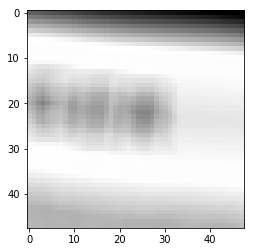

In [74]:
plt.imshow(patch_blurred, cmap='gray')